## Introduction
Welcome! This lesson explores the world of autoencoders, neural networks designed to learn efficient encodings of the input data. During this interactive session, we'll familiarize you with the autoencoder architecture, focusing on its encoder and decoder components, and how to implement these components using Python with the Keras API. We'll also show how to train and apply an autoencoder for digit image reconstruction with sklearn's digit dataset.

## Understanding Autoencoder Architecture and Preprocessing Data
Autoencoders are a type of neural network that learns to compress the input data into a lower-dimensional space and then reconstruct the original input from this compressed version. They are widely used for tasks such as dimensionality reduction, denoising, and anomaly detection.

Imagine we have a house, and we want to build an exact copy of the house across town. We could go back and forth between the old and new house to get the details of the house, but this process is time-consuming and inefficient. Instead, we could use an autoencoder to create a blueprint of the house that captures all the essential details. We then use this blueprint to build the new house, saving time and effort.

The two major components of an autoencoder - the encoder and the decoder - help compress the input data into a latent space and reconstruct the original input from the compressed version. Autoencoders are often employed for tasks such as dimensionality reduction and denoising.

Before implementing the components, preprocessing the data is our first step. We'll use sklearn's load_digits() function to download the digits dataset and normalize it.

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

data = load_digits().data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

The load_digits() function downloads the digits dataset, which contains 8x8 pixel images of handwritten digits. We normalize the data using the MinMaxScaler to ensure all features are within the same range. This step is crucial for training the autoencoder effectively.

The encoder will compress the digit images into a lower-dimensional space, while the decoder will attempt to reconstruct the original images from this compressed version. The autoencoder will learn to minimize the reconstruction error, improving its performance over time.

## Implementing Encoder and Decoder Components in Python
Once the data is ready, we move on to implementing the autoencoder components in Keras. The encoder transforms the input data into a latent-space representation. The decoder then reverts this process, attempting to recreate the original input. Note that in the previous lessons we used the Sequential model for building neural networks. However, for autoencoders, we'll use the following syntax, which allows us to define more complex architectures. With this approach we create an input layer and then stack additional layers on top of it.

In [2]:
from tensorflow.keras.layers import Input, Dense

# Create an input layer with 64 neurons to match the number of features in the digit images
input_img_layer = Input(shape=(64,))

# Create a consecutive layer with 32 neurons and ReLU activation function on the top of the input layer
encoded_layer = Dense(32, activation='relu')(input_img_layer)

# Create a consecutive layer with 64 neurons and Sigmoid activation function on the top of the encoded layer to reconstruct the original input
decoded_layer = Dense(64, activation='sigmoid')(encoded_layer)

2024-06-26 10:37:43.345475: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 10:37:43.345741: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 10:37:43.374247: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 10:37:43.626779: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 10:37:44.797557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

The Input shape for the encoder layer is 64, which matches the number of features in our digit images. The encoder is followed by the decoder layer, which reconstructs the original 64-feature input from the condensed output of the encoder. Once the encoder and decoder layers are defined, we can create the autoencoder model by tying the input and output layers together. We'll see this in the next section.

## Training the Autoencoder
Now that we've defined the encoder and decoder components, we can compile and train the autoencoder model. The autoencoder will learn to compress the input data into a lower-dimensional space and then reconstruct the original input from this compressed version. To do that we first need to create the autoencoder model by combining the input and output layers using the Model class. Moving on, we compile the autoencoder and define the loss function and optimizer. The optimizer 'adam' controls the learning rate, while 'binary_crossentropy' functions as our loss metric.

In [3]:
from tensorflow.keras.models import Model

# Autoencoder
autoencoder = Model(input_img_layer, decoded_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(data, data, epochs=100, batch_size=256, shuffle=True)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6969  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6600 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6268 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5915 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5552 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5181 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4858 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4618 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4441 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4318 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4226 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4164 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4100 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.4063
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4017 
Epoch 16/100
8/8 

With the autoencoder compiled, we train it using the actual data employing the fit method. This process adjusts the autoencoder weights to reduce the reconstruction error, improving the model's performance over the training period or epochs.

## Visualizing the Autoencoder Effectiveness
Once the autoencoder is trained, we'll apply it to the test set and visualize its effectiveness in input reconstruction.

In [4]:
reconstructed_data = autoencoder.predict(data)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


We cross-verify the autoencoder's performance by visualizing a set of actual digit images and their reconstructed versions generated by the autoencoder:

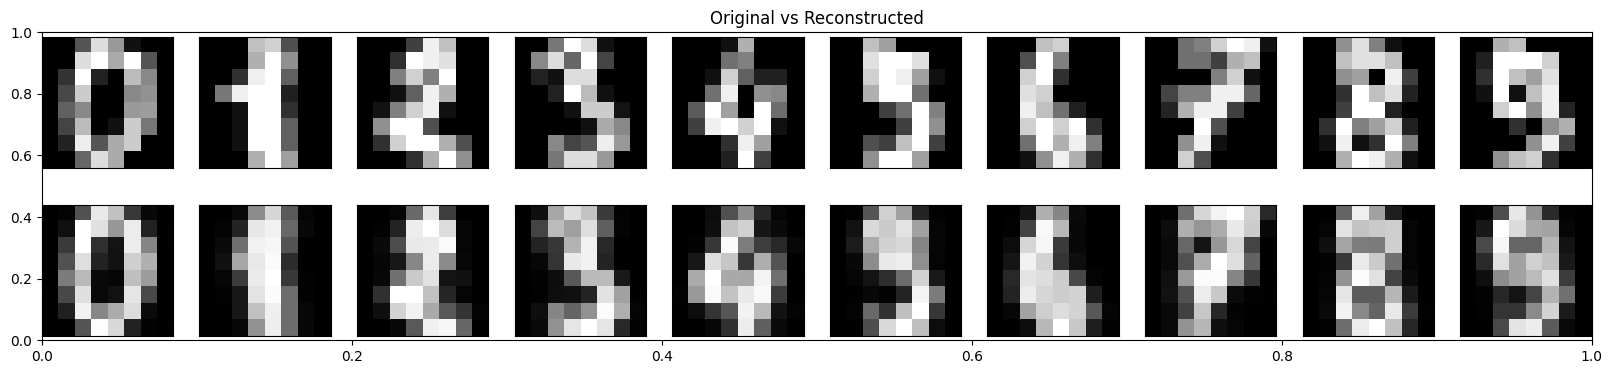

In [5]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
plt.title('Original vs Reconstructed')
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction as generated by our autoencoder
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_data[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

If our autoencoder is effectively trained, the reconstructed images should reveal digits similarly shaped as in the original images.
In the above code, we display the original digit images on the top row and their reconstructed versions on the bottom row. The reconstructed images should closely resemble the original images, indicating that the autoencoder has learned to compress and reconstruct the input data effectively.

## Using Encoder for Dimensionality Reduction
One of the major applications of an autoencoder is for dimensionality reduction. By extracting the encoding layers, you can transform the input features into a lower-dimensional space, making it easier to visualize and process.

Since we've already trained our autoencoder model, the encoder will have learned to compress the input images effectively. We can use this learned knowledge to transform our 64-dimensional images into a 32-dimensional encoded space.

To get the encoder, we create a new model using the autoencoder's input and the encoded output as follows:

In [6]:
# Encoder Model
encoder = Model(input_img_layer, encoded_layer)
# Apply the encoder to the data
encoded_data = encoder.predict(data)

print('Shape of the original data:', data.shape) # Output: (1797, 64)
print('Shape of encoded_data:', encoded_data.shape) # Output: (1797, 32)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
Shape of the original data: (1797, 64)
Shape of encoded_data: (1797, 32)


In the above code, we first define a new Model that shares the same input layer as the original autoencoder, but only outputs the encoder's output. We then transform our data by calling predict on the encoder model.

Now, encoded_data will be a new representation of our original input data but in the latent space as defined by our encoder. This action is similar to how Principal Component Analysis (PCA) compresses original data into a lower-dimensional space. However, unlike PCA, the encoder, as part of the autoencoder, does not necessarily maintain the linearity of features. Encoders can capture complex, non-linear relationships, making them a powerful tool for dimensionality reduction and a stepping stone to more complex tasks in deep learning.

This compressed representation can be beneficial for various tasks, like feature reduction, data visualization, or even used for training other machine learning models where the fewer number of features can result in less computation.

## Lesson Summary and Practice
We've successfully discovered the architecture behind autoencoders, implemented them using Python and Keras API, compiled and trained our model, and visualized the effectiveness of our autoencoder in digit image reconstruction. Brace yourself for the next level of autoencoder adventures. Next up, let's exercise to solidify these concepts! Keep practicing, and happy coding!



## Exploring Autoencoders with Digit Reconstruction

Imagine we need to compress a vast array — quite a challenge — of digit images to save storage space while maintaining the essence of the images. An autoencoder can learn to reduce the dimensionality of our data. Take a look at the given code where an autoencoder is trained to compress and reconstruct digit images. Let's see how this method performs by running the code!

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 0.7125
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6857 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6585 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6281 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.5921
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5534 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5145 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4830 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.4590
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4438 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4329 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4232 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4182 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4115 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4069 
Epoch 16/100
8/8

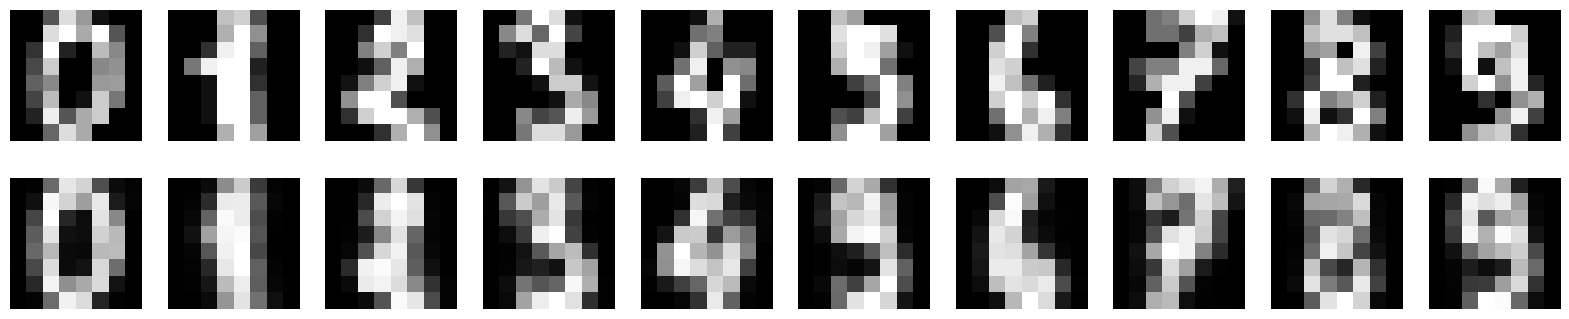

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses all TensorFlow logs, shows only errors

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load digits dataset and normalize data
digits_data = load_digits().data
scaler = MinMaxScaler()
data = scaler.fit_transform(digits_data)

# Define the encoder
input_img = Input(shape=(64,))
encoded = Dense(32, activation='relu')(input_img)

# Define the decoder
decoded = Dense(64, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data, epochs=100, batch_size=256, shuffle=True)

# Predict using the autoencoder
predicted = autoencoder.predict(data)

# Visualize the original and reconstructed data
n = 10  # Number of digit images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original digits
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[i].reshape(8, 8))
    plt.gray()
    ax.axis('off')

    # Display reconstructed digits
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(predicted[i].reshape(8, 8))
    plt.gray()
    ax.axis('off')
plt.show()

## Autoencoder Decoder Adjustment

Terrific progress, Celestial Traveler! It's time to experiment with our autoencoder's decoder component. Adjust the activation function of the last layer from 'relu' to 'sigmoid' and update the encoder layer to have 40 features. Witness the impact of this small change on the reconstructed images. Are you ready to embark on this micro-mission?

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6907  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6532 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6206 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5872 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5507 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.5142
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4810 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.4554
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4375 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4251 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4164 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4092 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4020 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.3957
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3913 
Epoch 16/100
8/

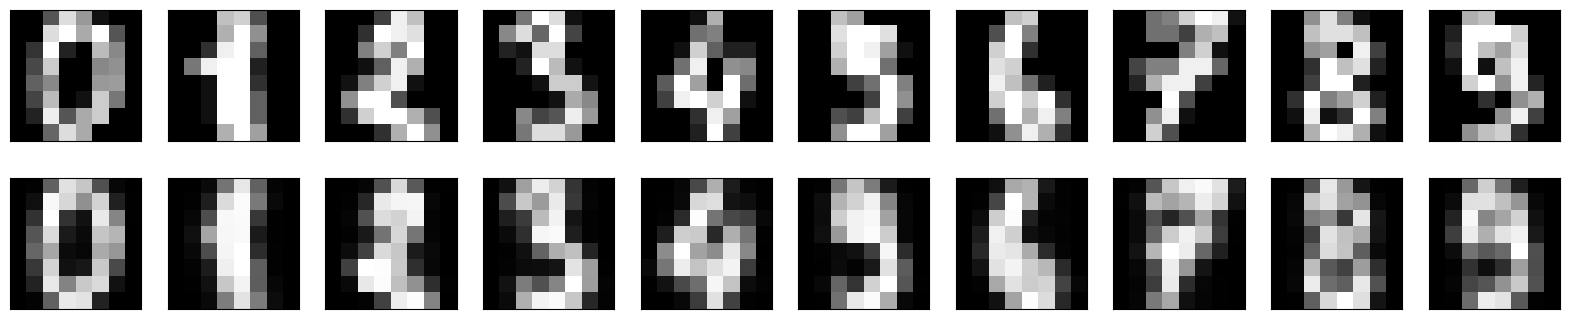

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses all TensorFlow logs, shows only errors

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load and preprocess the data
digits = load_digits()
data = digits.data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Build the encoder
input_img = Input(shape=(64,))
encoded = Dense(40, activation='relu')(input_img)

# Build the decoder
decoded = Dense(64, activation='sigmoid')(encoded)

# Build the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(normalized_data, normalized_data, epochs=100, batch_size=256, shuffle=True)

# Apply the trained autoencoder to the data
predicted = autoencoder.predict(normalized_data)

# Visualize original vs reconstructed images
plt.figure(figsize=(20, 4))
for i in range(10):  # Show 10 digits
    # Display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(normalized_data[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed (decoded) image
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(predicted[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Autoencoder Space Odyssey: Compress and Reconstruct

Your knowledge of autoencoder architecture has prepared you for the final frontier! Construct a simple autoencoder for our imaginary 8x8 digit images that can compress and then attempt to reconstruct them. Use the provided code structure to define the encoder and decoder, and train the autoencoder. The data loading and final visualisation part are already provided.

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7063  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.6833
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6629 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6384 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6065 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5683 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5282 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4925 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4644 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4462 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4354 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4230 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4178 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4114 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4060 
Epoch 16/100
8/8 

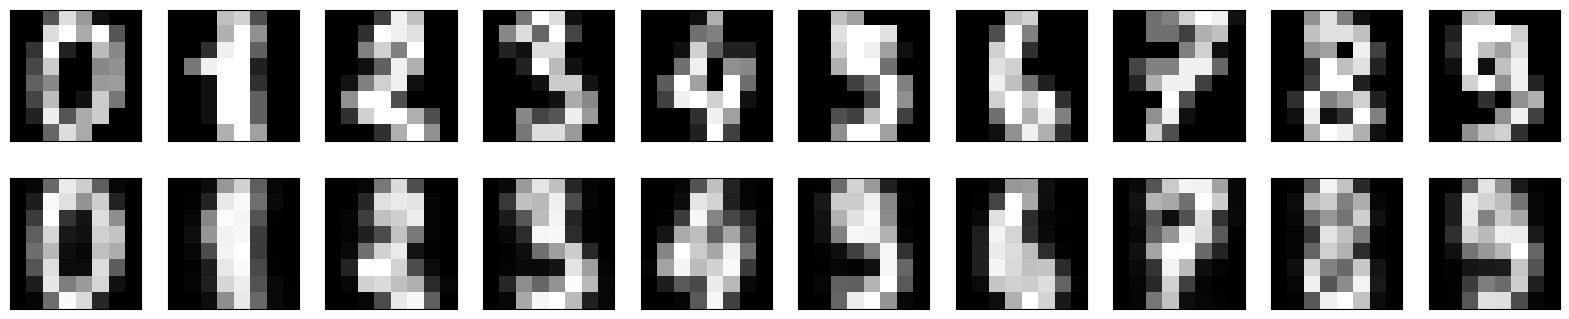

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

# Preprocessing the data
data = load_digits().data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create the input layer of the autoencoder
input_layer = Input(shape=(64,))

# Create the encoded layer with a reduced dimensionality and relu activation
encoded = Dense(32, activation='relu')(input_layer)

# Create the decoded layer to reconstruct the input
decoded = Dense(64, activation='sigmoid')(encoded)

# Build the autoencoder model and compile it with an optimizer and binary_crossentropy loss
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model with normalized data
autoencoder.fit(data_normalized, data_normalized, epochs=100, batch_size=256, shuffle=True)

# Predict the reconstructed data using the trained autoencoder
reconstructed_data = autoencoder.predict(data_normalized)

# Visualizing the original and reconstructed images
n = 10  # Display 10 digits
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_normalized[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_data[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
